# Import Files

In [103]:
import numpy as np
import pandas as pd
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# simpleImpulser for handling missing values
from sklearn.impute import SimpleImputer
# label encoder for encoding objects types features label as a numerical data.
from sklearn.preprocessing import LabelEncoder
# feature scalling
from sklearn.preprocessing import StandardScaler
# splitting training and testings
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# model_selection
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#ignoreing Warning

import warnings
warnings.filterwarnings("ignore")

# importing Dataset

In [104]:
dataset = pd.read_csv('weatherAUS.csv')


In [105]:
dataset.shape

(145460, 23)

# Sum Of Null values

In [106]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Percentage of null values

In [107]:
dataset.isnull().sum()*100/len(dataset)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Handling Missing Values

In [109]:
for column in dataset.columns:
    d1 = dataset[column].mode()
    dataset[column].fillna(d1[0], inplace = True)

In [110]:
dataset.isnull().sum()*100/len(dataset)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [111]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,Uluru,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No
145456,6/22/2017,Uluru,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No
145457,6/23/2017,Uluru,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No
145458,6/24/2017,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Dataset Dimention

In [112]:
dataset.shape

(145460, 23)

# Encoding Dataset(ML only compute with numerical values thats why we need to encode it as a numerical data)

In [113]:
le = LabelEncoder()
for column in dataset.columns:
    if column!='Date':
        dataset[column] = le.fit_transform(dataset[column])

In [114]:
dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,2,213,262,6,40,0,13,21,13,...,71,22,215,232,8,7,224,262,0,0
1,12/2/2008,2,153,284,0,40,0,14,21,6,...,44,25,244,239,7,7,227,287,0,0
2,12/3/2008,2,208,290,0,40,0,15,22,13,...,38,30,214,248,7,2,265,276,0,0
3,12/4/2008,2,171,313,0,40,0,4,10,9,...,45,16,314,290,7,7,236,309,0,0
4,12/5/2008,2,254,356,10,40,0,13,19,1,...,82,33,246,221,7,8,233,341,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,6/21/2017,41,107,267,0,40,0,0,14,9,...,51,24,384,366,7,7,156,268,0,0
145456,6/22/2017,41,115,286,0,40,0,6,9,9,...,56,21,373,354,7,7,164,289,0,0
145457,6/23/2017,41,133,302,0,40,0,3,17,9,...,53,24,348,331,7,7,180,305,0,0
145458,6/24/2017,41,157,303,0,40,0,9,12,10,...,51,24,332,327,3,2,206,304,0,0


# statistical Overview

In [115]:
dataset.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.00000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,23.793524,200.817909,264.934497,18.720253,47.958463,39.570686,8.09360,18.442912,6.999526,7.798852,...,69.430373,51.553396,313.210113,314.841441,5.428186,5.526055,224.907404,260.415970,0.219167,0.219146
std,14.228687,63.666097,70.941267,54.210590,28.982543,46.807837,4.69411,7.108925,4.515839,4.538135,...,19.280872,20.471345,67.366738,67.362958,2.583504,2.424496,64.487250,68.548206,0.413683,0.413669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,156.000000,213.000000,0.000000,40.000000,0.000000,4.00000,14.000000,3.000000,4.000000,...,57.000000,37.000000,273.000000,273.000000,3.000000,4.000000,178.000000,211.000000,0.000000,0.000000
50%,24.000000,198.000000,258.000000,0.000000,40.000000,1.000000,9.00000,17.000000,7.000000,8.000000,...,70.000000,52.000000,304.000000,315.000000,7.000000,7.000000,223.000000,253.000000,0.000000,0.000000
75%,36.000000,247.000000,315.000000,6.000000,52.000000,87.000000,13.00000,22.000000,11.000000,12.000000,...,84.000000,65.000000,356.000000,357.000000,7.000000,7.000000,270.000000,306.000000,0.000000,0.000000
max,48.000000,388.000000,504.000000,680.000000,357.000000,144.000000,15.00000,66.000000,15.000000,15.000000,...,100.000000,100.000000,545.000000,548.000000,9.000000,9.000000,440.000000,501.000000,1.000000,1.000000


# initalization of X & Y

In [116]:
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values

In [117]:
Y = Y.reshape(-1,1)

In [118]:
# imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# X = imputer.fit_transform(X)
# Y = imputer.fit_transform(Y)

# data Exploring

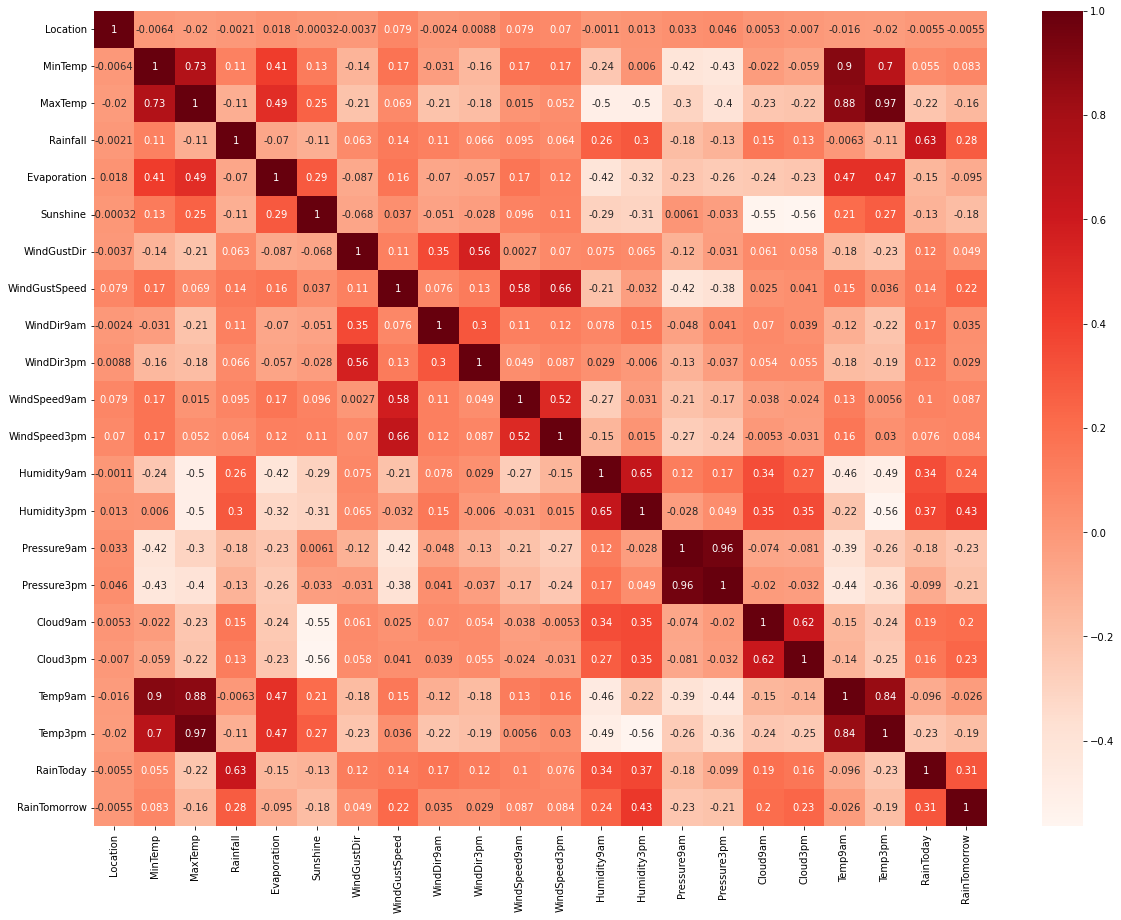

In [119]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(), annot=True, cmap='Reds')
plt.show()

# Data Visualization

In [120]:
dataset.RainTomorrow.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [121]:
dataset.MinTemp.value_counts()

189    2384
181     898
175     896
184     884
169     872
       ... 
381       1
6         1
3         1
7         1
379       1
Name: MinTemp, Length: 389, dtype: int64

array([[<AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustDir'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindDir9am'}>,
        <AxesSubplot:title={'center':'WindDir3pm'}>],
       [<AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>],
       [<AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'

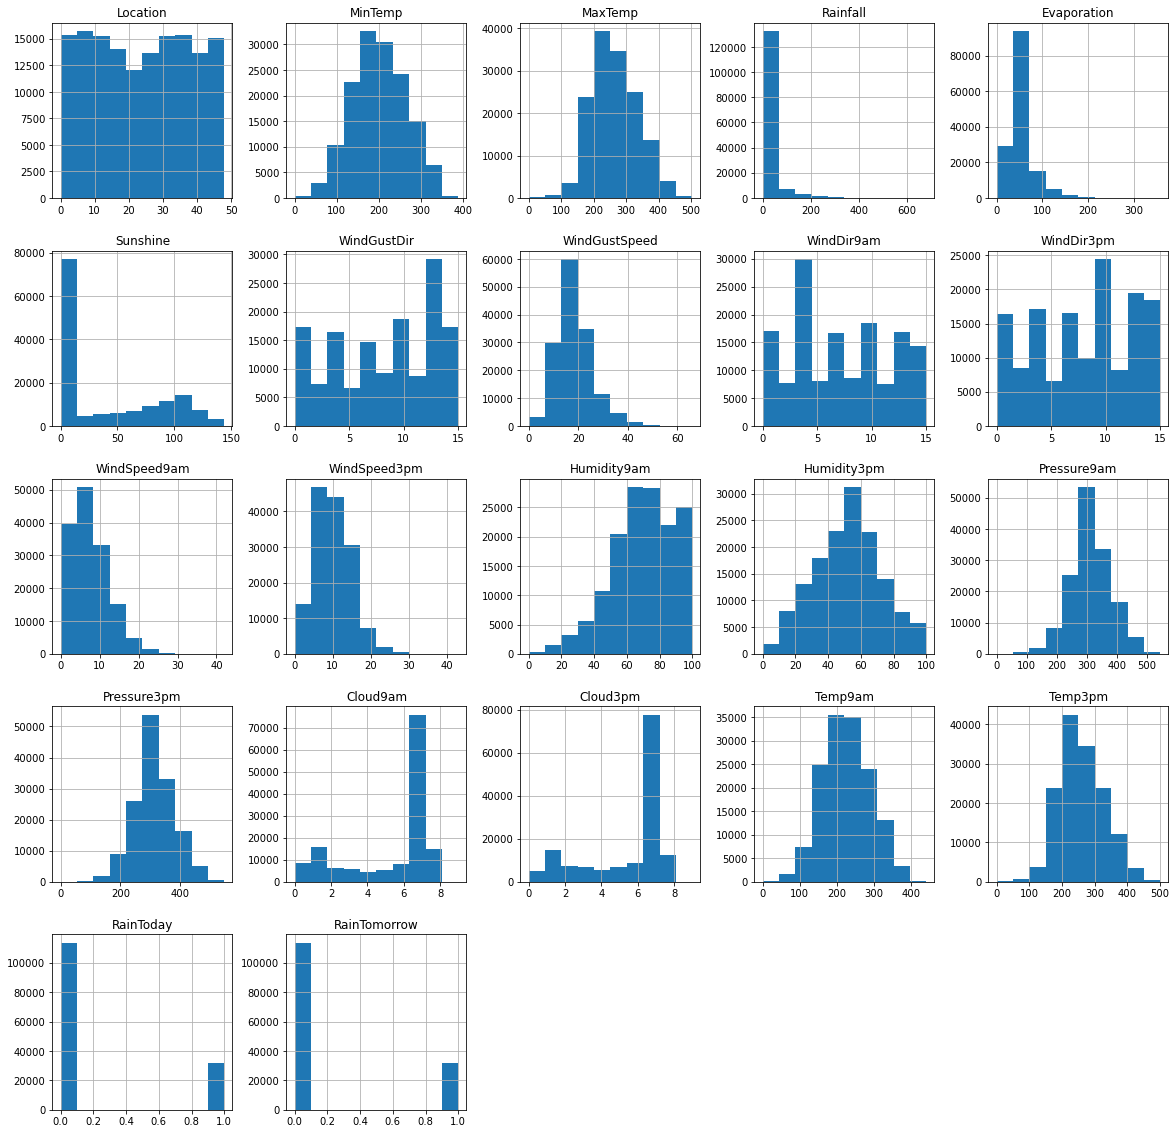

In [122]:
dataset.hist(figsize=(20,20))

In [123]:
dataset.RainTomorrow.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

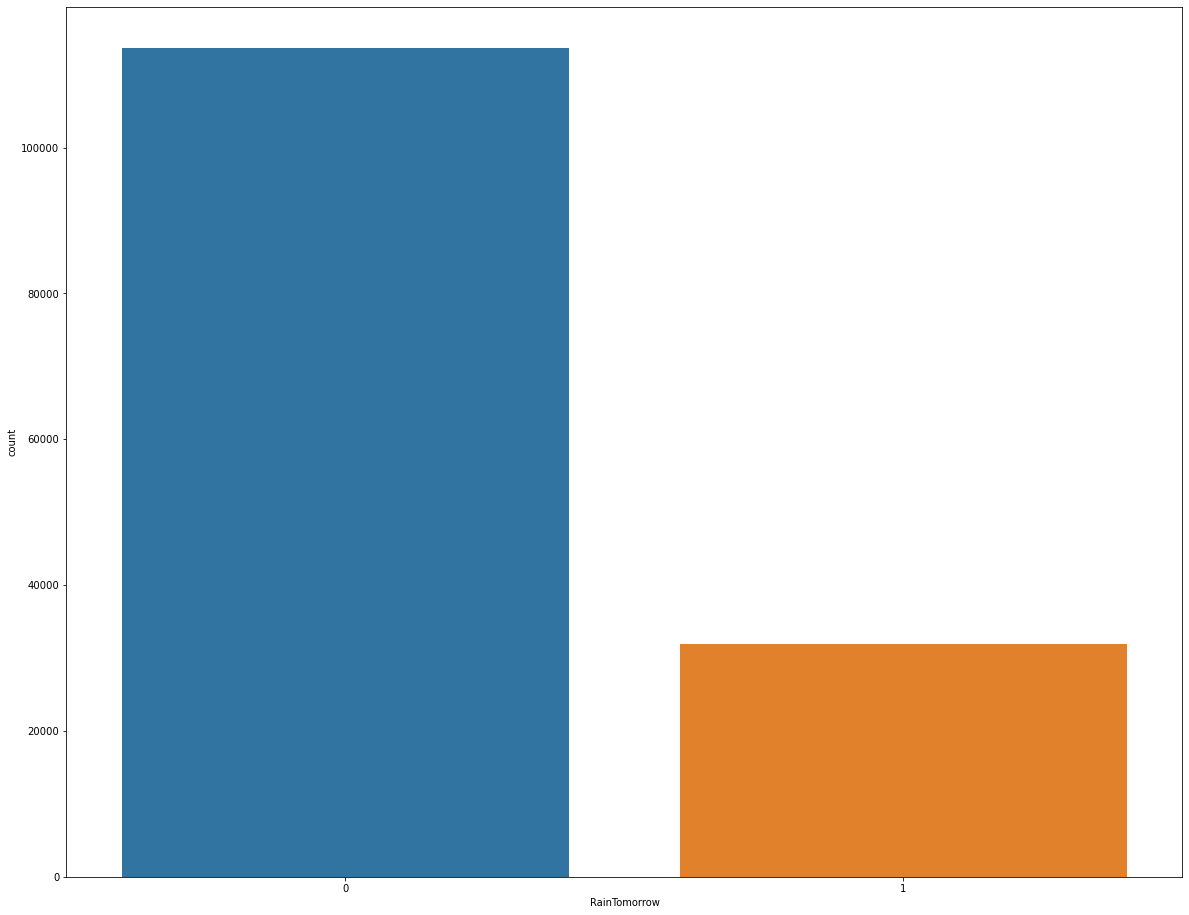

In [124]:
plt.figure(figsize=(20,16))
sns.countplot(x="RainTomorrow",data=dataset)
plt.show()

In [125]:

# le1 = LabelEncoder()
# X[:,0] = le1.fit_transform(X[:,0])
# le2 = LabelEncoder()
# X[:,4] = le2.fit_transform(X[:,4])
# le3 = LabelEncoder()
# X[:,6] = le3.fit_transform(X[:,6])
# le4 = LabelEncoder()
# X[:,7] = le4.fit_transform(X[:,7])
# le5 = LabelEncoder()
# X[:,-1] = le5.fit_transform(X[:,-1])
# le6 = LabelEncoder()
# Y[:,-1] = le6.fit_transform(Y[:,-1])

# Feature Scalling

In [126]:
sc = StandardScaler()
X = sc.fit_transform(X)

# After Scalling Feature

In [127]:
print(X)

[[-1.53166617  0.19134412 -0.04136531 ... -0.01407111  0.02310834
  -0.52979545]
 [-1.53166617 -0.75107593  0.26875145 ...  0.03244987  0.38781644
  -0.52979545]
 [-1.53166617  0.11280911  0.35332875 ...  0.62171567  0.22734488
  -0.52979545]
 ...
 [ 1.20928479 -1.06521595  0.52248334 ... -0.69637888  0.65040628
  -0.52979545]
 [ 1.20928479 -0.68824793  0.53657956 ... -0.29319701  0.63581795
  -0.52979545]
 [ 1.20928479  0.42694913 -0.45015558 ... -0.30870401 -0.10818657
  -0.52979545]]


In [128]:
Y = np.array(Y,dtype=float)
print(Y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


# Splitting Dataset as training and testing

In [129]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [130]:
print(X_train)

[[ 0.22535368  1.03952217  0.07140442 ...  0.68374365  0.08146164
  -0.52979545]
 [ 1.42012717 -0.45264292  0.11369307 ... -0.41725297  0.22734488
  -0.52979545]
 [ 0.50647685 -0.2013309  -0.14003883 ... -0.06059209 -0.02065663
   1.88752093]
 ...
 [ 1.0687232   0.75679615  0.93127361 ...  1.10243251  1.07346767
  -0.52979545]
 [ 0.57675765 -0.04426089 -0.16823126 ...  0.01694288 -0.28324646
   1.88752093]
 [ 1.63096955 -0.02855389 -0.91533072 ... -0.35522499 -0.76466115
  -0.52979545]]


In [131]:
print(Y_train)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [132]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))

models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
temp = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=False)
    cv_results = cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    temp.append(msg)
    print(msg)

temp

LR: 84.169188 (0.003987)
LDA: 84.017083 (0.003819)
KNN: 83.249695 (0.002744)
CART: 78.022315 (0.005165)
NB: 79.844115 (0.003284)


['LR: 84.169188 (0.003987)',
 'LDA: 84.017083 (0.003819)',
 'KNN: 83.249695 (0.002744)',
 'CART: 78.022315 (0.005165)',
 'NB: 79.844115 (0.003284)']

In [133]:
# columns = dataset.columns
# columns


# optimization technique

In [134]:
# classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [135]:
classifier.score(X_train,Y_train)

0.841786401759934

# Prediction On Testing Data

In [136]:

y_pred = le.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le.inverse_transform(np.array(Y_test,dtype=int))

In [146]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.8427058985288052
[[21585  1141]
 [ 3435  2931]]
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22726
         Yes       0.72      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.73     29092
weighted avg       0.83      0.84      0.83     29092



# Predicted Value

In [137]:
y_pred.shape

(29092,)

In [138]:
y_pred = y_pred.reshape(29092,1)

In [139]:
y_pred.shape

(29092, 1)

In [140]:
y_pred

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [141]:
X_test.shape

(29092, 19)

In [142]:
X_test

array([[-1.46138537,  1.52643919,  2.28451038, ...,  1.9863312 ,
         2.00712041,  1.88752093],
       [ 1.27956559,  1.30654118,  2.01668227, ...,  1.59865633,
         2.05088538, -0.52979545],
       [ 0.85788082, -1.11233695, -0.84484964, ..., -1.06854675,
        -0.80842613, -0.52979545],
       ...,
       [ 0.71731924, -0.24845191, -1.09858153, ..., -0.97550478,
        -1.12936926,  1.88752093],
       [ 0.57675765,  1.00810816,  0.52248334, ...,  0.66823665,
         0.6066413 , -0.52979545],
       [ 0.92816162, -0.81390394, -0.90123451, ..., -0.71188587,
        -0.73548451, -0.52979545]])

In [143]:
print(y_pred)

[['No']
 ['No']
 ['No']
 ...
 ['Yes']
 ['No']
 ['No']]


In [144]:
X_test[19] = y_pred

ValueError: could not broadcast input array from shape (29092,1) into shape (19,)

# user Input

In [ ]:
# userTesting = []

# for i in range(0, 22):
#     n = float(input())
#     userTesting.append(n)
# a = np.array(userTesting).reshape(0,8)

# print(a)

# y_pred = lr.predict(a)

# print(y_pred)